## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
def calculate(nesterov_parameter=False,MOMENTUM=0.95):
#     if nesterov_parameter is None:
#         nesterov_parameter=False
#     if MOMENTUM is None:
#         MOMENTUM=0.95
        ## 超參數設定
    print ('nesterov_parameter:',nesterov_parameter)
    print ('MOMEMTUM:',MOMENTUM)
    LEARNING_RATE = [1e-1, 1e-2]
    EPOCHS = 50
    BATCH_SIZE = 256
    results = {}
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=nesterov_parameter, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    import matplotlib.pyplot as plt
    %matplotlib inline
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

nesterov_parameter: False
MOMEMTUM: 0.85
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.9010 - acc: 0.3162 - val_loss: 1.7506 - val_acc: 0.3812
Epoch 2/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.6958 - acc: 0.3969 - val_loss: 1.6596 - val_acc: 0.4047
Epoch 3/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.6022 - acc: 0.4313 - val_loss: 1.5805 - val_acc: 0.4332
Epoch 4/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5425 - acc: 0.4539 - val_loss: 1.6167 - val_acc: 0.4226
Epoch 5/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.4998 - acc: 0.4687 - val_loss: 1.4859 - val_acc: 0.4765
Epoch 6/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.4636 - acc: 0.4796 - val_loss: 1.5096 - val_acc: 0.4596
Epoch 7/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.4298 - acc: 0.4936 - val_loss: 1.

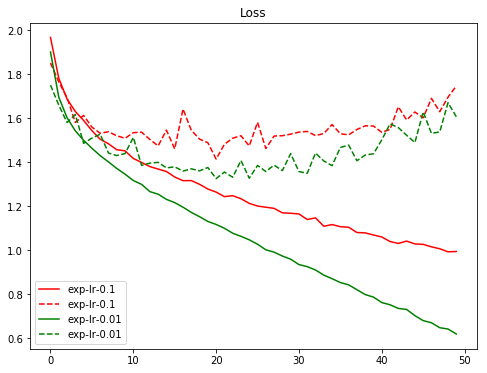

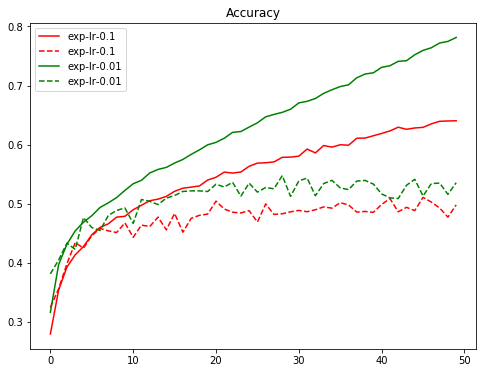

In [18]:
calculate(False,0.85)

nesterov_parameter: True
MOMEMTUM: 0.85
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.8925 - acc: 0.3228 - val_loss: 1.7985 - val_acc: 0.3602
Epoch 2/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.6907 - acc: 0.4008 - val_loss: 1.7154 - val_acc: 0.3866
Epoch 3/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.6055 - acc: 0.4327 - val_loss: 1.6463 - val_acc: 0.4090
Epoch 4/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5411 - acc: 0.4567 - val_loss: 1.6038 - val_acc: 0.4318
Epoch 5/50
50000/50000 [==============================] - 13s 265us/step - loss: 1.4972 - acc: 0.4706 - val_loss: 1.6409 - val_acc: 0.4302
Epoch 6/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.4536 - acc: 0.4863 - val_loss: 1.5520 - val_acc: 0.4479
Epoch 7/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.4171 - acc: 0.4996 - val_loss: 1.

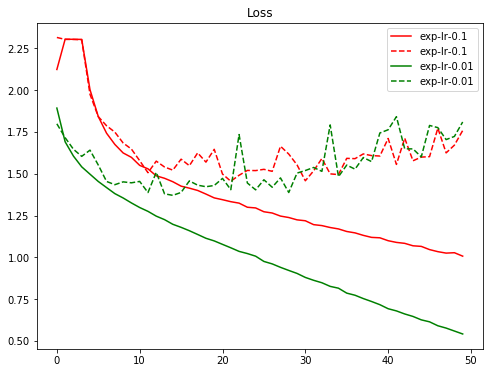

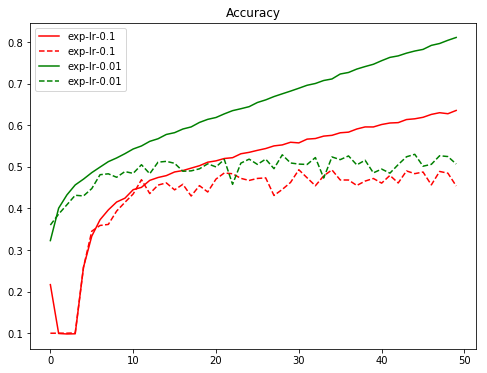

In [19]:
calculate(True,0.65)

nesterov_parameter: True
MOMEMTUM: 0.45
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 272us/step - loss: 2.0158 - acc: 0.2771 - val_loss: 1.9742 - val_acc: 0.2712
Epoch 2/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.8320 - acc: 0.3510 - val_loss: 1.7927 - val_acc: 0.3654
Epoch 3/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7556 - acc: 0.3818 - val_loss: 1.8290 - val_acc: 0.3397
Epoch 4/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.7051 - acc: 0.3981 - val_loss: 1.7237 - val_acc: 0.3863
Epoch 5/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.6629 - acc: 0.4147 - val_loss: 1.6855 - val_acc: 0.4008
Epoch 6/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.6365 - acc: 0.4251 - val_loss: 1.6964 - val_acc: 0.3858
Epoch 7/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.6011 - acc: 0.4361 - val_loss: 1.

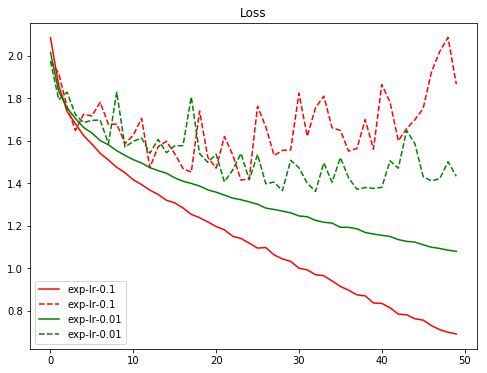

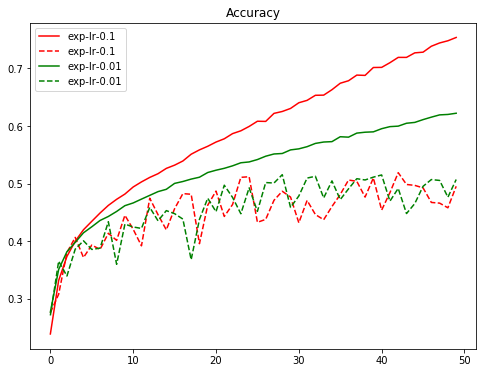

In [20]:
calculate(True,0.45)

nesterov_parameter: True
MOMEMTUM: 0.15
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.0405 - acc: 0.2711 - val_loss: 1.9475 - val_acc: 0.2992
Epoch 2/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.8688 - acc: 0.3391 - val_loss: 1.9603 - val_acc: 0.3053
Epoch 3/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.8058 - acc: 0.3627 - val_loss: 1.8474 - val_acc: 0.3392
Epoch 4/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.7523 - acc: 0.3839 - val_loss: 1.7609 - val_acc: 0.3773
Epoch 5/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.7235 - acc: 0.3924 - val_loss: 1.7362 - val_acc: 0.3801
Epoch 6/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.6905 - acc: 0.4031 - val_loss: 1.6994 - val_acc: 0.3935
Epoch 7/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.6594 - acc: 0.4157 - val_loss: 1.

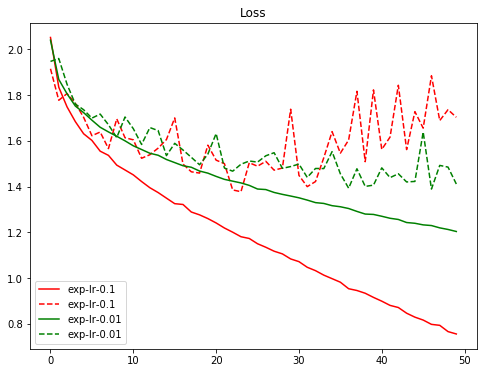

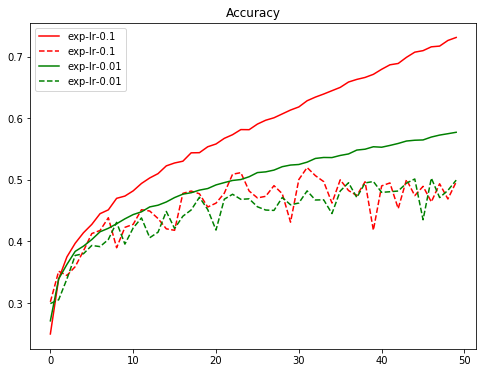

In [21]:
calculate(True,0.15)